# K-Nearest Neighbor

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
%matplotlib inline
plt.style.use('seaborn')

In [2]:
import sklearn
import matplotlib
import sys
libraries = (('Matplotlib', matplotlib), ('Numpy', np), ('Pandas', pd), ('Scipy', scipy), ('Sklearn', sklearn))

print("Python Version:", sys.version, '\n')
for lib in libraries:
    print('{0} Version: {1}'.format(lib[0], lib[1].__version__))

Python Version: 3.6.2 |Anaconda custom (64-bit)| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] 

Matplotlib Version: 2.0.2
Numpy Version: 1.12.1
Pandas Version: 0.20.3
Scipy Version: 0.19.1
Sklearn Version: 0.19.0


In [3]:
def get_data():
    from sklearn.datasets import load_iris
    iris = load_iris()
    return iris.data, iris.target

In [5]:
import numpy as np
import copy


class k_neighbors:
    
    def __init__(self, n_neighbors=5, return_dist=False):
        """
        KNearestNeighbors finds the nearest points in the feature space.
        ---
        In: n_neighbors (int) - how many closest neighbors do we consider
        """
        if n_neighbors > 0:
            self.k = int(n_neighbors)
        else:
            print("n_neighbors must be >0. Set to 5!")
            self.k = 5
        self.X = None
        self._return_dist = return_dist
        
    def fit(self, X):
        """
        Makes a copy of the training data that can live within the class.
        Thus, the model can be serialized and used away from the original
        training data. 
        ---
        In: X (features); np.array or pandas dataframe/series
        """
        self.X = copy.copy(self.convert_to_array(X))
    
    def find_neighbors(self, X):
        """
        Iterates through all points to predict, calculating the distance
        to all of the training points. It then finds the closest points.
        ___
        In: new data to predict (np.array, pandas series/dataframe)
        Out: predictions (np.array)
        """
        X = self.convert_to_array(X)
        results = []
        for x in X:
            local_results = []
            for x2 in self.X:
                local_results.append([self.dist_between_points(x,x2),x2])
            neighbors = sorted(local_results, key=lambda x: x[0])[:self.k]
            if self._return_dist:
                results.append(neighbors)
            else:
                for x in neighbors:
                    results.append(x[1])
                #results.append([x[1] for x in neighbors])
        return np.array(results)

    def dist_between_points(self, a, b):
        """
        Calculates the distance between two vectors.
        ---
        Inputs: a,b (np.arrays)
        Outputs: distance (float)"""
        assert np.array(a).shape == np.array(b).shape, 'Vectors must be of same size'
        return np.sqrt(np.sum((a-b)**2))
    
    def pandas_to_numpy(self, x):
        """
        Checks if the input is a Dataframe or series, converts to numpy matrix for
        calculation purposes.
        ---
        Input: X (array, dataframe, or series)
        Output: X (array)
        """
        if type(x) == type(pd.DataFrame()) or type(x) == type(pd.Series()):
            return x.as_matrix()
        if type(x) == type(np.array([1,2])):
            return x
        return np.array(x) 
    
    def handle_1d_data(self,x):
        """
        Converts 1 dimensional data into a series of rows with 1 columns
        instead of 1 row with many columns.
        """
        if x.ndim == 1:
            x = x.reshape(-1,1)
        return x
    
    def convert_to_array(self, x):
        """
        Takes in an input and converts it to a numpy array
        and then checks if it needs to be reshaped for us
        to use it properly
        """
        x = self.pandas_to_numpy(x)
        x = self.handle_1d_data(x)
        return x

In [6]:
X,y = get_data()

In [7]:
def shuffle_data(X, y):
    assert len(X) == len(y)
    permute = np.random.permutation(len(y))
    return X[permute], y[permute]

def train_test_split_manual(X, y, test_size=0.3):
    nX, ny = shuffle_data(X,y)
    split_index = int(len(X)*test_size)
    testX = nX[:split_index]
    trainX = nX[split_index:]
    testy = ny[:split_index]
    trainy = ny[split_index:]
    return trainX, testX, trainy, testy

In [8]:
kn = k_neighbors(n_neighbors=3, return_dist=False)
kn.fit(X)

In [9]:
print(X[:1])
kn.find_neighbors(X[:1])

[[ 5.1  3.5  1.4  0.2]]


array([[ 5.1,  3.5,  1.4,  0.2],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5. ,  3.6,  1.4,  0.2]])

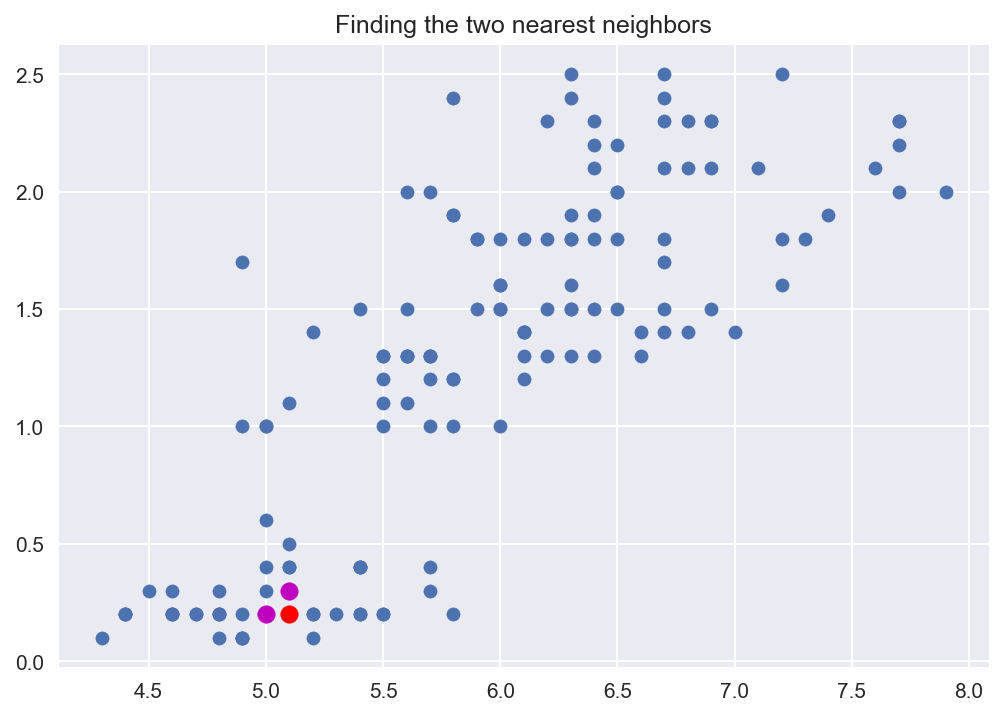

In [10]:
plt.figure(dpi=150)
plt.scatter(X[:,0],X[:,3], s=40)
plt.scatter(X[0,0],X[0,3],c='r', s=70)
neighbors = kn.find_neighbors(X[:1])
plt.scatter(neighbors[1:,0],neighbors[1:,3],c='m', s=70); #skip the closest one, because it is itself.
plt.title("Finding the two nearest neighbors")